### Load the Stroke Prediction Cleaned Data

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import preprocessed data file
stroke = pd.read_csv('../Dataset/healthcare-dataset-stroke-data-cleaned.csv')
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.2+ KB


### Exploratory Data Analysis

In this dataset, *stroke* is our target parameter which tells whether a patient has stroke or not.  '0' means the result is negative and '1' means the patient has stroke.  Let's take a look at the relationships between the target parameter and the categorical parameters.

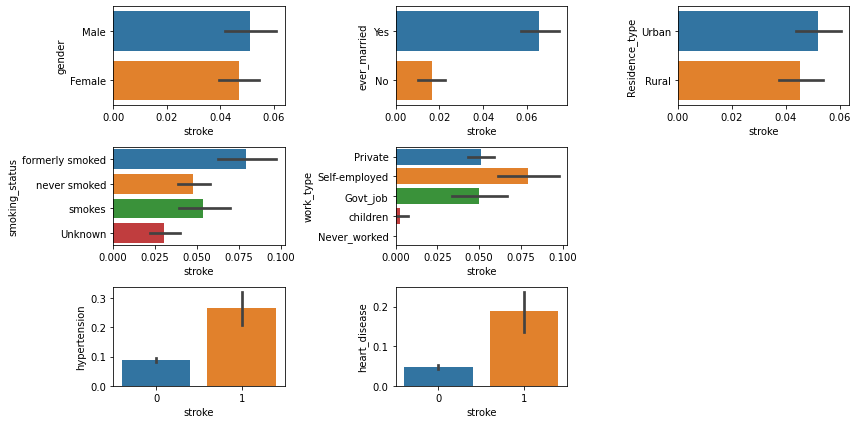

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(12, 6))
fig.delaxes(axes[1,2])
fig.delaxes(axes[2,2])

sns.barplot(x='stroke', y='gender', data=stroke, ax=axes[0,0])
sns.barplot(x='stroke', y='ever_married', data=stroke, ax=axes[0,1])
sns.barplot(x='stroke', y='Residence_type', data=stroke, ax=axes[0,2])
sns.barplot(x='stroke', y='smoking_status', data=stroke, ax=axes[1,0])
sns.barplot(x='stroke', y='work_type', data=stroke, ax=axes[1,1])
sns.barplot(x='stroke', y='hypertension', data=stroke, ax=axes[2,0])
sns.barplot(x='stroke', y='heart_disease', data=stroke, ax=axes[2,1])

plt.tight_layout()
plt.show()

From the above plots, male and female seem to have about the same chance getting a stroke.  On the other hand, if a patient has hypertension or heart disease may increase the risk of having a stroke.  We can also further analyze whether the smoking status, work type and if the patient ever married will contribute to the risk of having a stroke.

Now, let's take a look at the three numerical parameters.

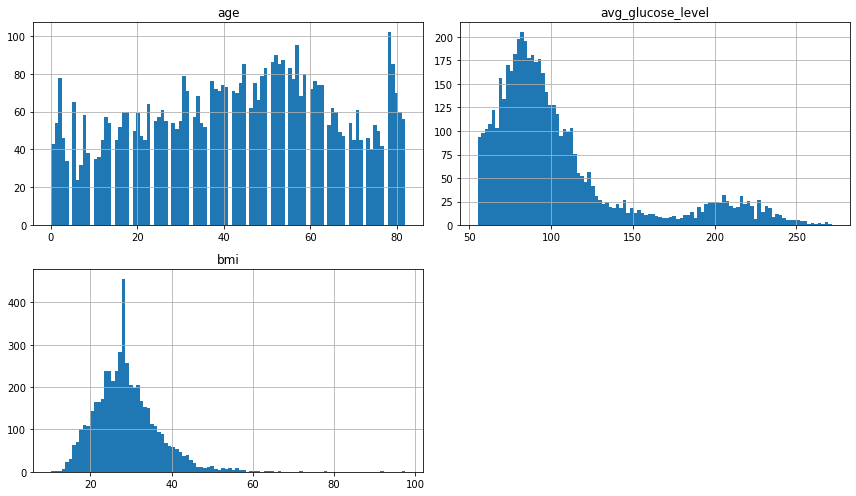

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
fig.delaxes(axes[1,1])

stroke.hist(column='age', bins=100, ax=axes[0,0])
stroke.hist(column='avg_glucose_level', bins=100, ax=axes[0,1])
stroke.hist(column='bmi', bins=100, ax=axes[1,0])

plt.tight_layout()
plt.show()

Before we build the predictive models, let's take a look at our target variable.

In [5]:
stroke.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

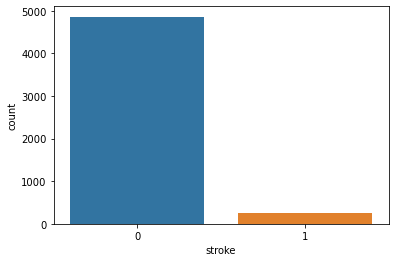

In [6]:
sns.countplot(x=stroke.stroke)

As we can see, the majority class is '0' not having stroke and the minority class is '1' which indicates patients have stroke.  As we expected, most of the patients are considered 'normal' who do not have stroke and only some patients are 'abnormal' who are diagnosed with stroke.  Because of this, as it is shown in the above plot, the dataset is imbalanced.  A class imbalanced problem usually leads to a learning bias to the majority class.  We will have to address this problem when we build our models.